In [6]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv(r"C:\Users\Banoth Sudhar\Downloads\adult_csv.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [9]:
df.shape

(48842, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
df.describe()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.771078,1.896641e+05,10.078089,0.200319,0.114942,1.950698
std,1.295378,1.056040e+05,2.570973,0.746182,0.556924,0.897038
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.175505e+05,9.000000,0.000000,0.000000,2.000000
50%,2.000000,1.781445e+05,10.000000,0.000000,0.000000,2.000000
75%,3.000000,2.376420e+05,12.000000,0.000000,0.000000,2.000000
max,4.000000,1.490400e+06,16.000000,4.000000,4.000000,4.000000


In [14]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
class             0
dtype: int64

In [15]:
df.replace('?', np.nan, inplace=True)
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
class             0
dtype: int64

In [16]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

In [17]:
round(df.isnull().sum() * 100 / len(df.index), 2)

age               0.00
workclass         5.73
fnlwgt            0.00
education         0.00
education-num     0.00
marital-status    0.00
occupation        5.75
relationship      0.00
race              0.00
sex               0.00
capitalgain       0.00
capitalloss       0.00
hoursperweek      0.00
native-country    1.75
class             0.00
dtype: float64

In [18]:
df = df.loc[df['native-country'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)

age               0.00
workclass         5.74
fnlwgt            0.00
education         0.00
education-num     0.00
marital-status    0.00
occupation        5.76
relationship      0.00
race              0.00
sex               0.00
capitalgain       0.00
capitalloss       0.00
hoursperweek      0.00
native-country    0.00
class             0.00
dtype: float64

In [19]:
df = df.loc[df['occupation'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capitalgain       0.0
capitalloss       0.0
hoursperweek      0.0
native-country    0.0
class             0.0
dtype: float64

In [20]:
df.shape

(45222, 15)

In [21]:
# Percentage of rows lost in data cleaning.

(48842 - len(df.index)) * 100 / 48842

7.411653904426518

######  So, we have lost 7.41% of the rows from the dataframe. This is fine considering that we have more than 45,000 datapoints in the dataframe.


In [22]:
num_attributes = df.select_dtypes(include=['int64'])
print(num_attributes.columns)

Index(['age', 'fnlwgt', 'education-num', 'capitalgain', 'capitalloss',
       'hoursperweek'],
      dtype='object')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capitalgain'}>],
       [<AxesSubplot:title={'center':'capitalloss'}>,
        <AxesSubplot:title={'center':'hoursperweek'}>]], dtype=object)

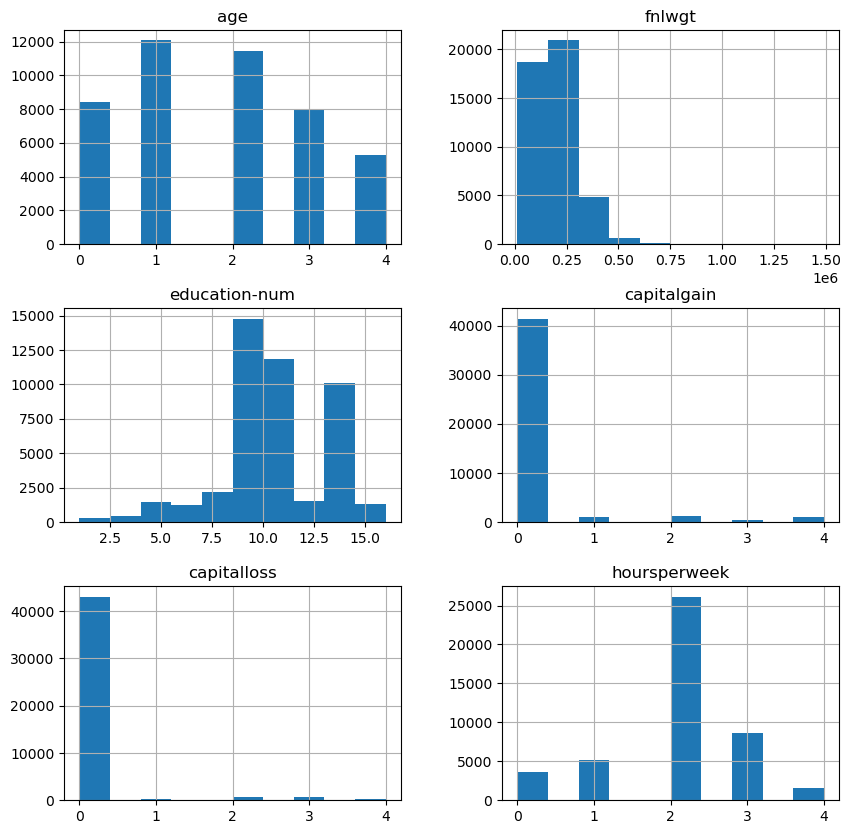

In [23]:
num_attributes.hist(figsize=(10,10))

In [24]:
cat_attributes = df.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')


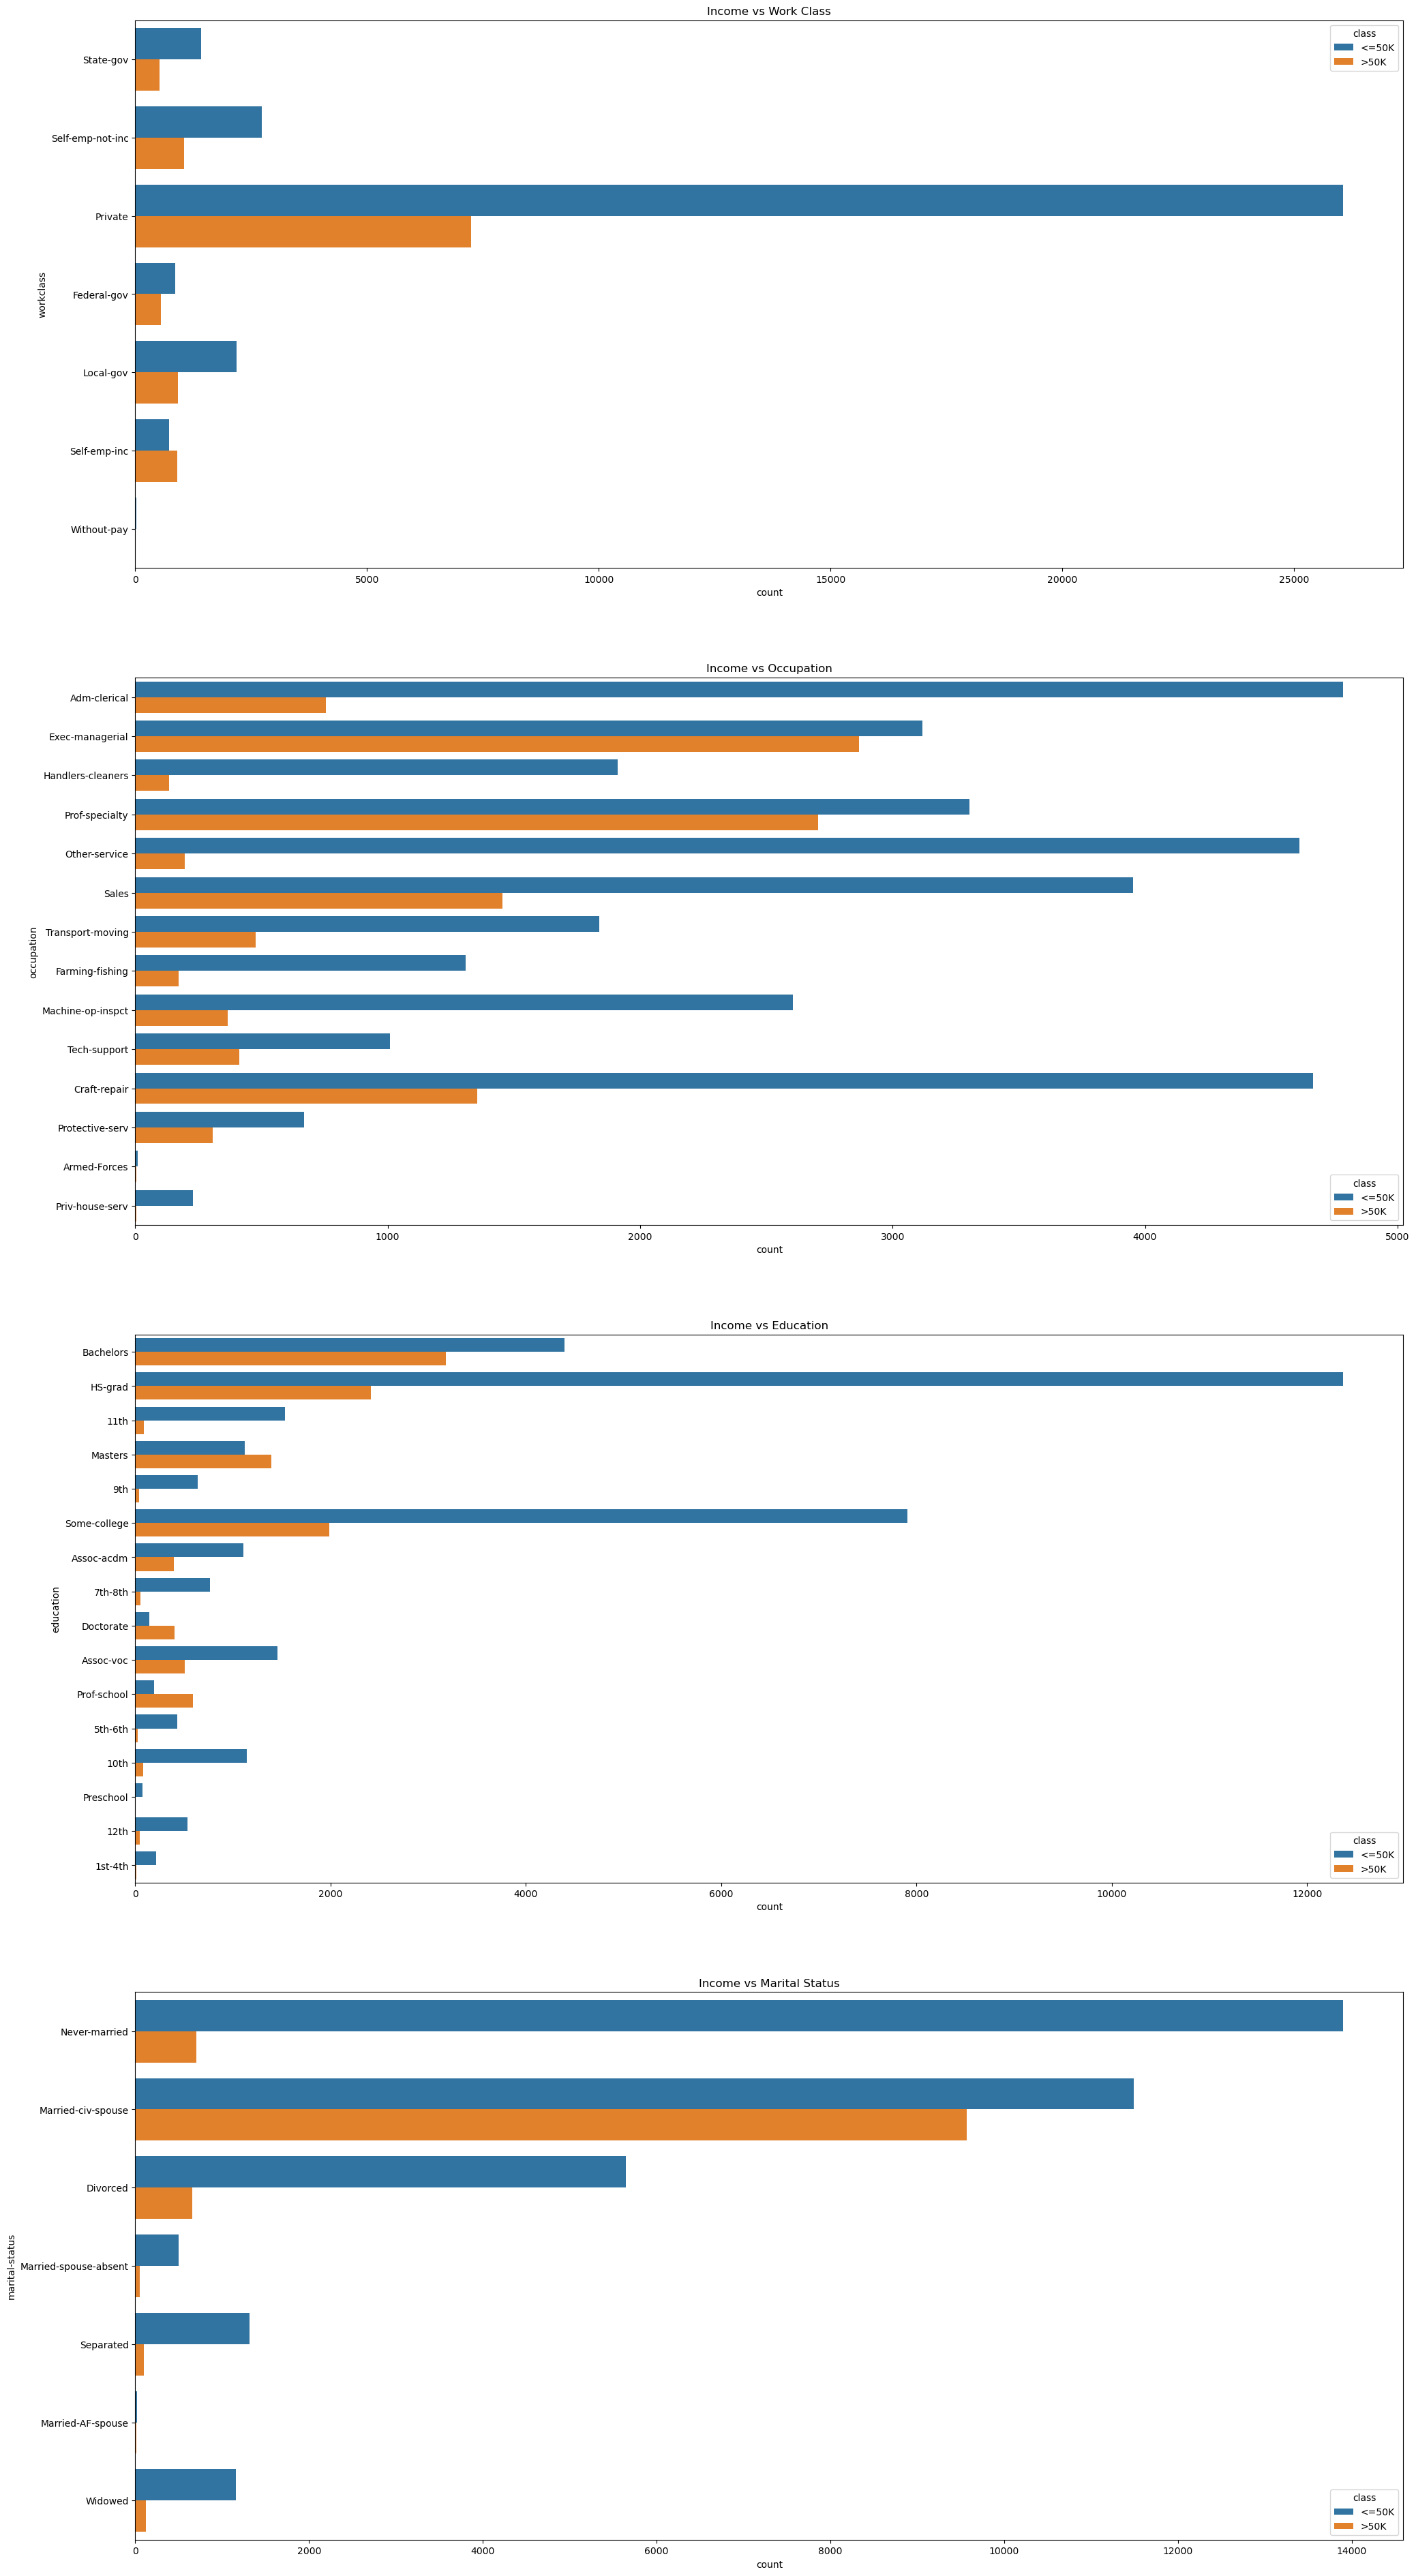

In [27]:
plt.figure(figsize=(24, 48))

plt.subplot(411)
sns.countplot(y='workclass', hue='class', data = cat_attributes)
plt.title('Income vs Work Class')

plt.subplot(412)
sns.countplot(y='occupation', hue='class', data = cat_attributes)
plt.title('Income vs Occupation')

plt.subplot(413)
sns.countplot(y='education', hue='class', data=cat_attributes)
plt.title('Income vs Education')

plt.subplot(414)
sns.countplot(y='marital-status', hue='class', data=cat_attributes)
plt.title('Income vs Marital Status')

plt.show()

In [28]:
df['class'].value_counts()

<=50K    34014
>50K     11208
Name: class, dtype: int64

In [29]:
df['class'].value_counts(normalize = True)

<=50K    0.752156
>50K     0.247844
Name: class, dtype: float64

In [31]:
df['sex'].value_counts(normalize=True)

Male      0.675048
Female    0.324952
Name: sex, dtype: float64

In [33]:
df['income_category'] = "null"
df.loc[df['class'] == '>50K', ['income_category']] = 'high income'
df.loc[df['class'] == '<=50K', ['income_category']] = 'low income'
df.loc[:, 'income_category'].head()

0    low income
1    low income
2    low income
3    low income
4    low income
Name: income_category, dtype: object

In [35]:
# Now I am interested in looking at the racewise distribution of income.

racewise_income_dist = df.pivot_table(values=['income_category'], 
                                      index=['class', 'race'], 
                                      aggfunc = 'count')
racewise_income_dist

income_category
class race                               
<=50K Amer-Indian-Eskimo              382
      Asian-Pac-Islander              934
      Black                          3694
      Other                           308
      White                         28696
>50K  Amer-Indian-Eskimo               53
      Asian-Pac-Islander              369
      Black                           534
      Other                            45
      White                         10207

In [38]:


# Let us also look into the racewise gender distibution of income

racewise_income_dist = df.pivot_table(values=['income_category'], 
                                      index=['class', 'race', 'sex'], 
                                      aggfunc = 'count')
racewise_income_dist



income_category
class race               sex                    
<=50K Amer-Indian-Eskimo Female              152
                         Male                230
      Asian-Pac-Islander Female              371
                         Male                563
      Black              Female             1958
                         Male               1736
      Other              Female              117
                         Male                191
      White              Female            10428
                         Male              18268
>50K  Amer-Indian-Eskimo Female               14
                         Male                 39
      Asian-Pac-Islander Female               65
                         Male                304
      Black              Female              126
                         Male                408
      Other              Female                9
                         Male                 36
      White              Female             1455
                         Male               8752

In [39]:
df.pivot_table(values=['class'], index=['workclass', 'sex'], aggfunc='count')

class
workclass        sex          
Federal-gov      Female    445
                 Male      961
Local-gov        Female   1244
                 Male     1856
Private          Female  11428
                 Male    21879
Self-emp-inc     Female    199
                 Male     1447
Self-emp-not-inc Female    617
                 Male     3179
State-gov        Female    755
                 Male     1191
Without-pay      Female      7
                 Male       14

In [40]:
# Relationship-wise salary distribution for low income group

relationship_wise_low_income = df.loc[df['class'] == '<=50K', :].pivot_table(values=['class'], index=['relationship'], aggfunc='count')
relationship_wise_low_income['percent'] = round(relationship_wise_low_income['class'] * 100 / relationship_wise_low_income['class'].sum(), 2)
relationship_wise_low_income

,class,percent
relationship,,
Husband,10159,29.87
Not-in-family,10474,30.79
Other-relative,1299,3.82
Own-child,6521,19.17
Unmarried,4486,13.19
Wife,1075,3.16


In [43]:
# Relationship-wise salary distribution for high income group

relationship_wise_high_income = df.loc[df['class'] == '>50K', :].pivot_table(values=['class'], index=['relationship'], aggfunc='count')
relationship_wise_high_income['percent'] = round(relationship_wise_high_income['class'] * 100 / relationship_wise_high_income['class'].sum(), 2)
relationship_wise_high_income

,class,percent
relationship,,
Husband,8507,75.90
Not-in-family,1228,10.96
Other-relative,50,0.45
Own-child,105,0.94
Unmarried,302,2.69
Wife,1016,9.06


#####  In the high income group, about 75% of people are husbands whereas in low income group, the percentage share is quite well distribted between husbands, own childs and people who are not a part of any family.


In [45]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'native-country', 'class',
       'income_category'],
      dtype='object')

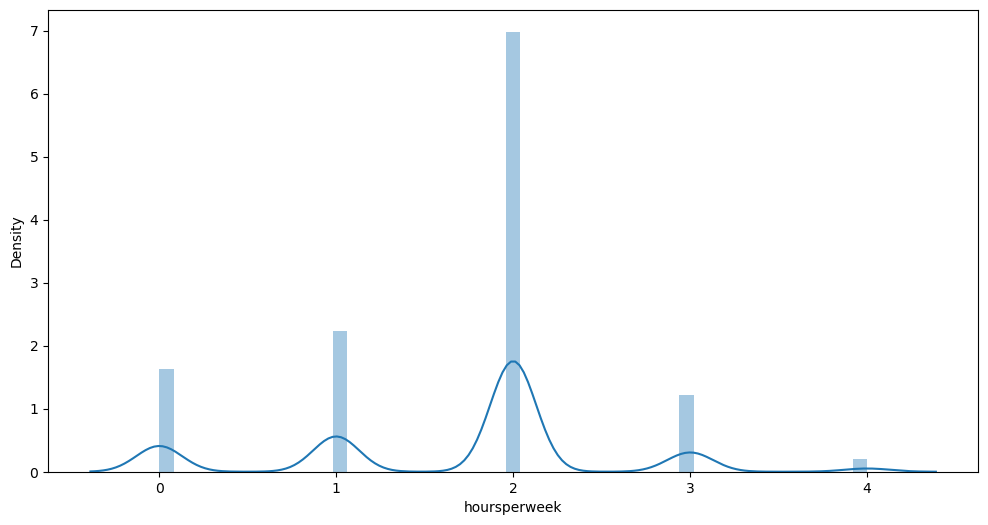

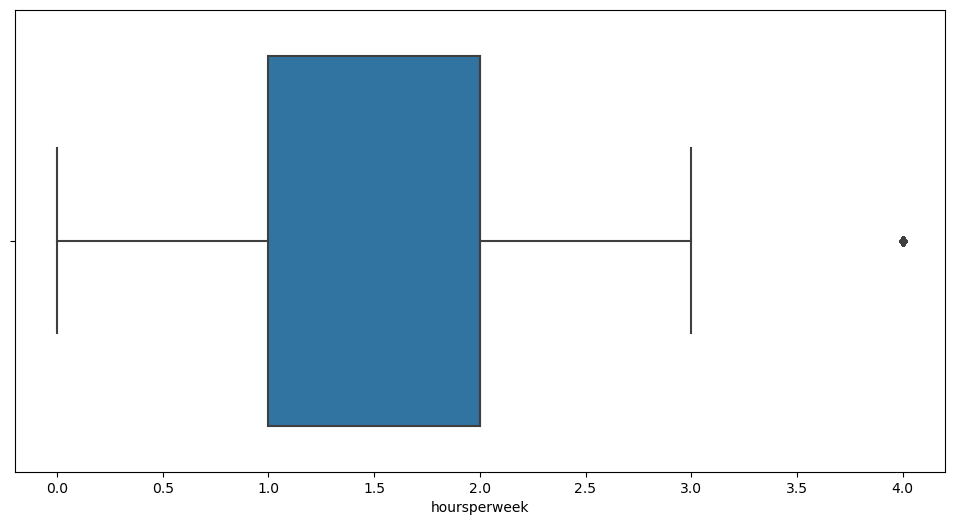

In [46]:


# Plotting distribution and box plots for the number of working hours for females.
working_hours_female = df.loc[df['sex'] == 'Female', ['hoursperweek']]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(working_hours_female['hoursperweek'])
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(working_hours_female['hoursperweek'])
plt.show()



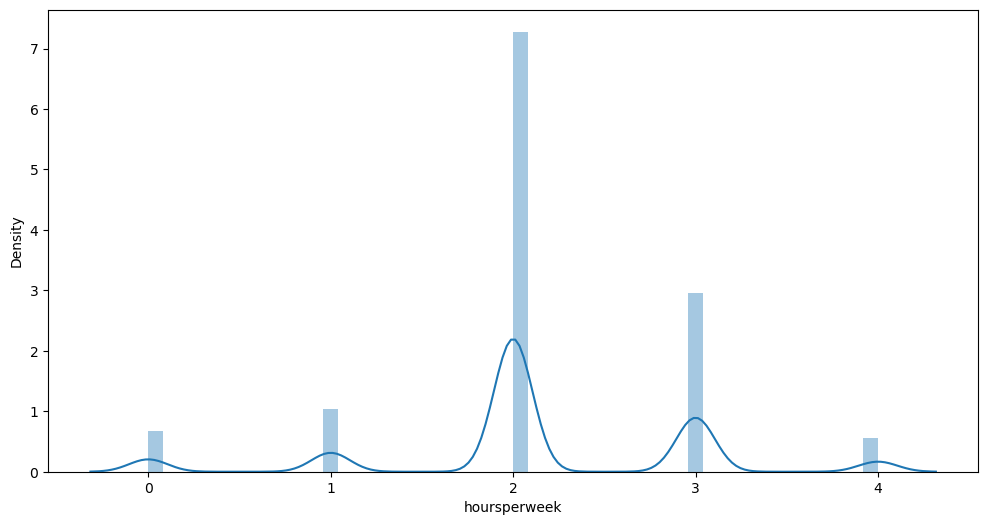

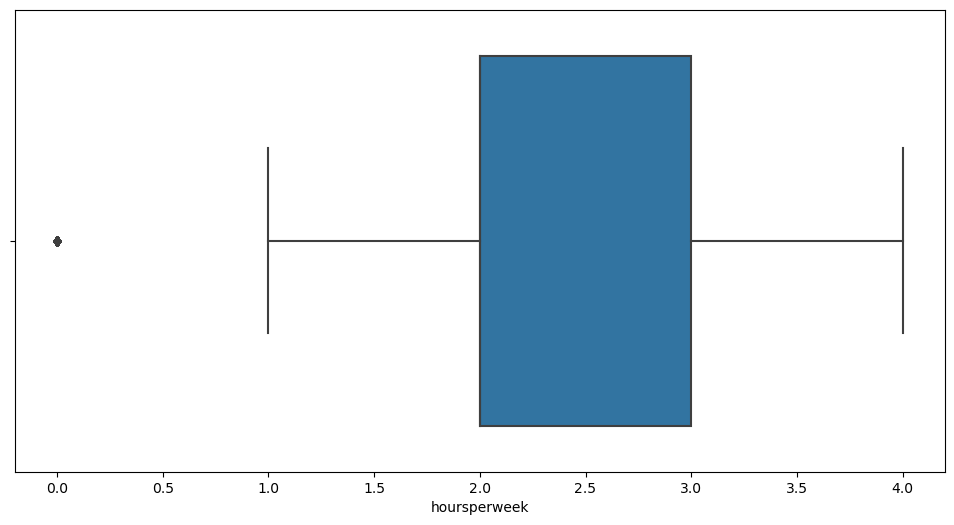

In [48]:

# Plotting distribution and box plots for the number of working hours for females.
working_hours_female = df.loc[df['sex'] == 'Male', ['hoursperweek']]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(working_hours_female['hoursperweek'])
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(working_hours_female['hoursperweek'])
plt.show()



## There are lot of outliers in the 'hours-per-week' data both for males and females.


<AxesSubplot:xlabel='class', ylabel='hoursperweek'>

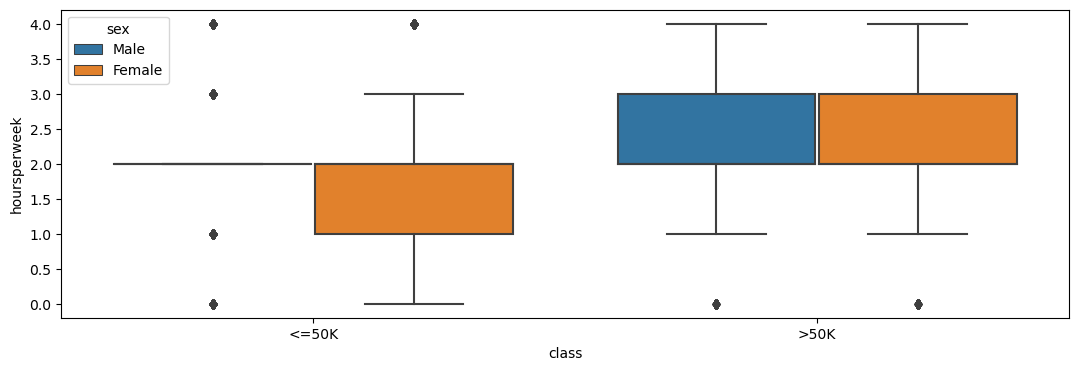

In [52]:


# Grouped boxplot for income, gender and number of hours per week.

plt.figure(figsize=(13, 4))
sns.boxplot(data=df, x='class', y='hoursperweek', hue='sex')



<AxesSubplot:xlabel='class', ylabel='age'>

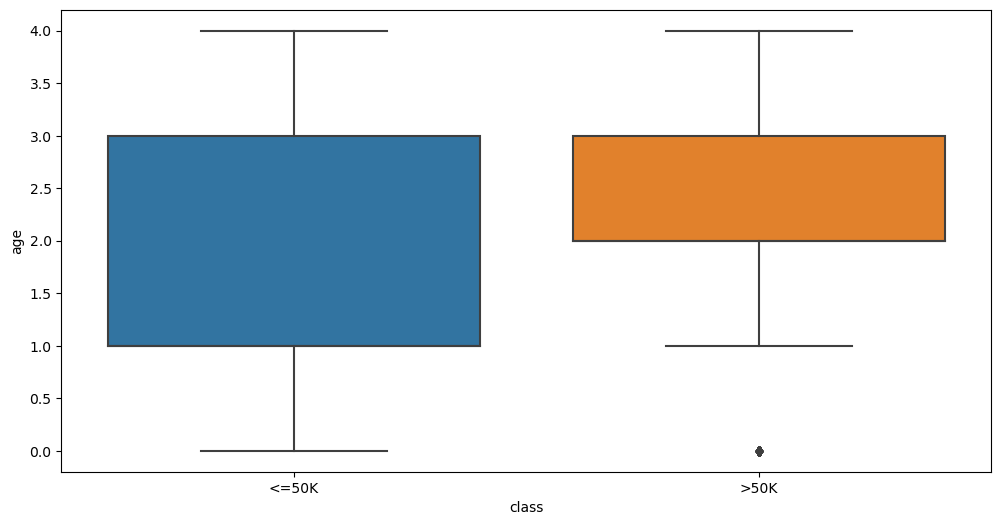

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='age')


### Step 3: Data Prepration
  * Removing outliers and unnecessary columns

In [54]:
print(f"Number of columns before deleting: {df.shape[1]}")

del_cols = ['fnlwgt','education']
df.drop(labels = del_cols, axis = 1, inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 16
Number of columns after deleting: 14


In [55]:
# drop rows with age 90
print("Number of observation before removing:", df.shape)
index_age = df[df['age'] == 90].index
df.drop(labels = index_age, axis = 0, inplace =True)
print("Number of observation after removing:", df.shape)

Number of observation before removing: (45222, 14)
Number of observation after removing: (45222, 14)


In [57]:
#drop rows with capital gain = 99999
print("Number of observation before removing:",df.shape)
index_gain = df[df['capitalgain'] == 99999].index
df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation before removing: (45222, 14)
Number of observation after removing: (45222, 14)


In [58]:
df.drop('income_category', axis=1, inplace=True)

In [59]:
categorical = df.select_dtypes(include=['object'])

categorical.head()

,workclass,marital-status,occupation,relationship,race,sex,native-country,class
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [60]:
numerical = df.select_dtypes(include=['int64', 'float64'])

numerical.head()

,age,education-num,capitalgain,capitalloss,hoursperweek
0,2,13,1,0,2
1,3,13,0,0,0
2,2,9,0,0,2
3,3,7,0,0,2
4,1,13,0,0,2


In [61]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

df_num = pd.DataFrame(scaler.fit_transform(numerical), 
                      columns = numerical.columns)

df_num.head()

,age,education-num,capitalgain,capitalloss,hoursperweek
0,0.181930,1.128753,1.051280,-0.207942,0.013644
1,0.971338,1.128753,-0.271176,-0.207942,-2.271528
2,0.181930,-0.438122,-0.271176,-0.207942,0.013644
3,0.971338,-1.221559,-0.271176,-0.207942,0.013644
4,-0.607479,1.128753,-0.271176,-0.207942,0.013644


In [64]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_cat = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names_out(categorical.columns))

df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_>50K
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df = pd.concat([df_num, df_cat], axis=1)

df.head()

,age,education-num,capitalgain,capitalloss,hoursperweek,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_>50K
0,0.181930,1.128753,1.051280,-0.207942,0.013644,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.971338,1.128753,-0.271176,-0.207942,-2.271528,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.181930,-0.438122,-0.271176,-0.207942,0.013644,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.971338,-1.221559,-0.271176,-0.207942,0.013644,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.607479,1.128753,-0.271176,-0.207942,0.013644,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
y = df.pop('class_>50K')

X = df

In [68]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [69]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31655, 80) (31655,)
(13567, 80) (13567,)


## Step 4: Training the Model


In [70]:


from sklearn.linear_model import LogisticRegression

clf_logit = LogisticRegression()

clf_logit.fit(X_train, y_train)



LogisticRegression()

## Step 5: Testing


In [72]:
X_test.head()

,age,education-num,capitalgain,capitalloss,hoursperweek,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
40273,-0.607479,1.128753,-0.271176,-0.207942,0.013644,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1984,1.760747,1.520471,5.018650,-0.207942,2.298815,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1230,0.181930,-0.046403,-0.271176,-0.207942,0.013644,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25507,-0.607479,0.345316,-0.271176,-0.207942,1.156229,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
553,0.181930,-2.004996,-0.271176,-0.207942,0.013644,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [73]:
y_test_pred = clf_logit.predict(X_test)

## Step 6: Model Evaluation


In [74]:


from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8421906095673325

In [92]:
# metrics.plot_confusion_matrix(clf_logit, X_test, y_test)

In [84]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10211
         1.0       0.73      0.58      0.64      3356

    accuracy                           0.84     13567
   macro avg       0.80      0.75      0.77     13567
weighted avg       0.83      0.84      0.84     13567



In [85]:
prob = clf_logit.predict_proba(X_test)
prob = prob[:, 1]
roc_auc = metrics.roc_auc_score(y_test, prob)
print(roc_auc)

0.9005380395000414


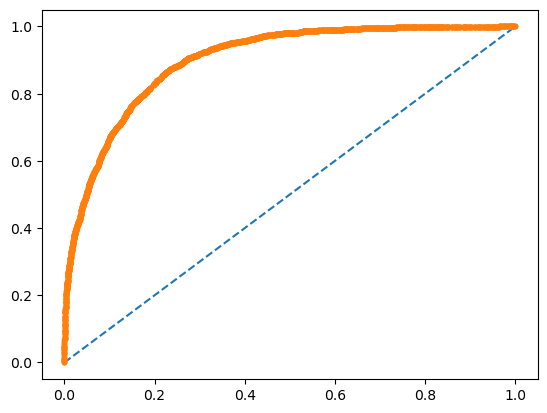

In [86]:
# ploting roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

In [89]:
# metrics.plot_roc_curve(clf_logit, X_test, y_test)

 ##  Feature Elimination using RFE


<AxesSubplot:>

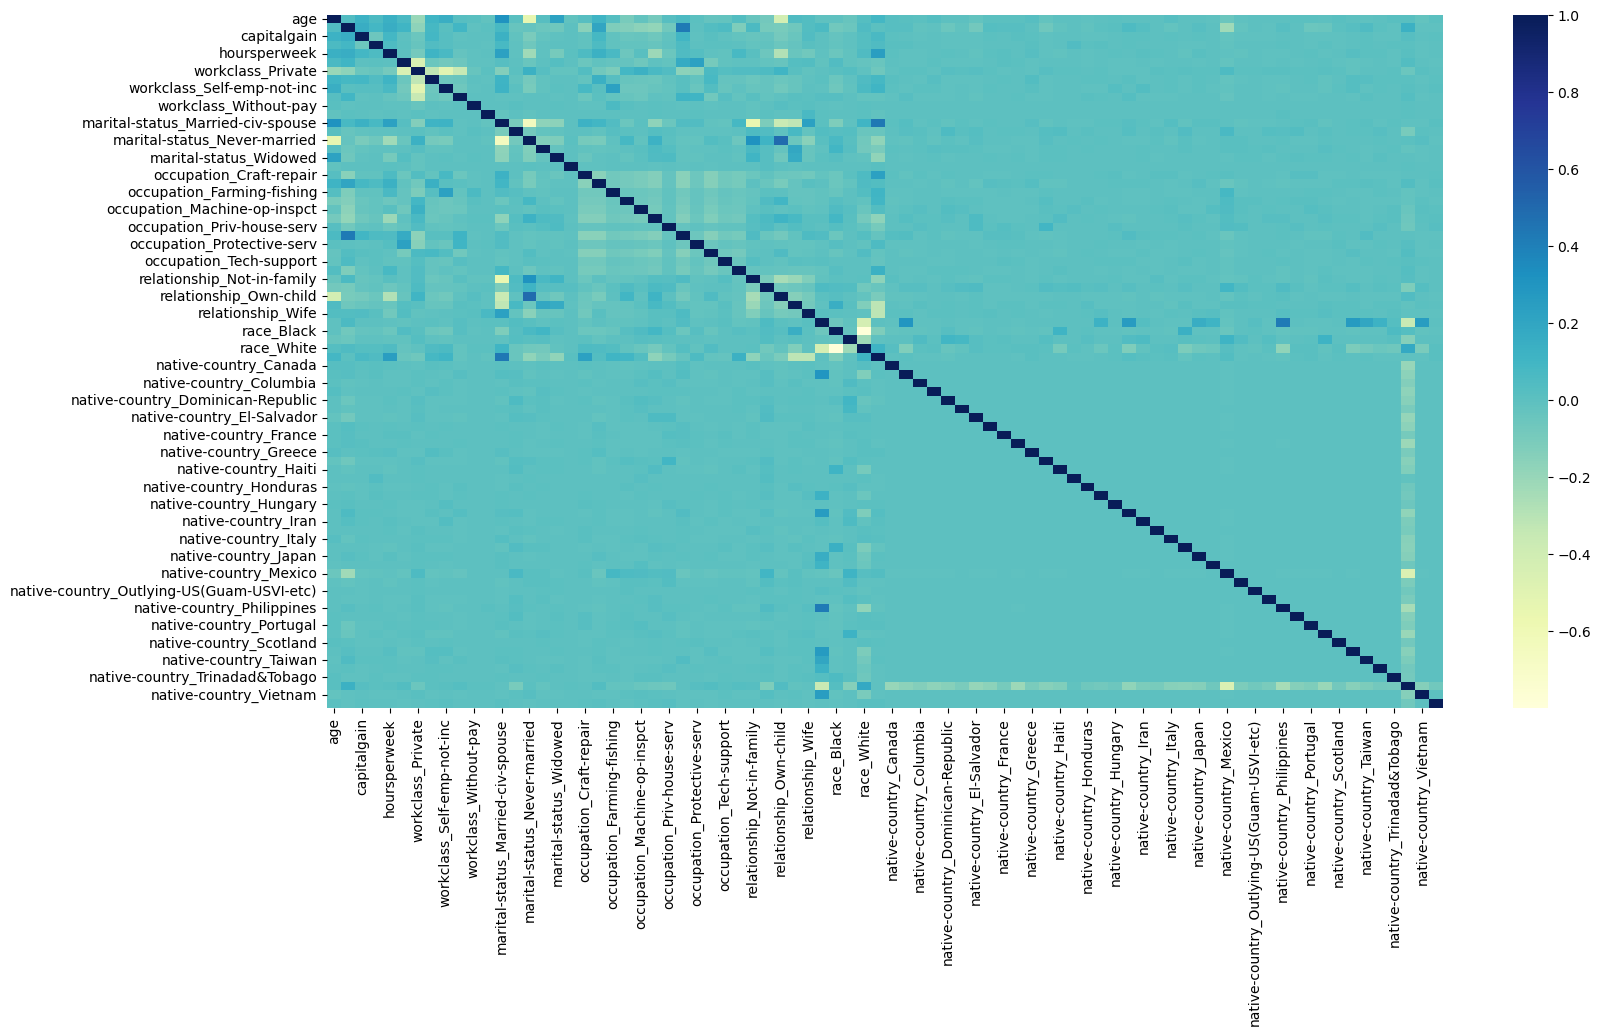

In [93]:


plt.figure(figsize=(18, 9))
sns.heatmap(X_train.corr(), cmap="YlGnBu")



In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

clf_logit_rfe = LogisticRegression()

rfe = RFE(clf_logit_rfe)
rfe = rfe.fit(X_train, y_train)

In [95]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df.loc[temp_df.Included == True, :]

,Columns,Included,Ranking
0,age,True,1
1,education-num,True,1
2,capitalgain,True,1
4,hoursperweek,True,1
5,workclass_Local-gov,True,1
6,workclass_Private,True,1
8,workclass_Self-emp-not-inc,True,1
9,workclass_State-gov,True,1
10,workclass_Without-pay,True,1
11,marital-status_Married-AF-spouse,True,1


In [96]:
X_train_cols = list(X_train.columns[rfe.support_])

In [97]:
len(X_train_cols)

40

In [98]:
X_train_rfe = X_train[X_train_cols]

X_train_rfe.shape

(31655, 40)

<AxesSubplot:>

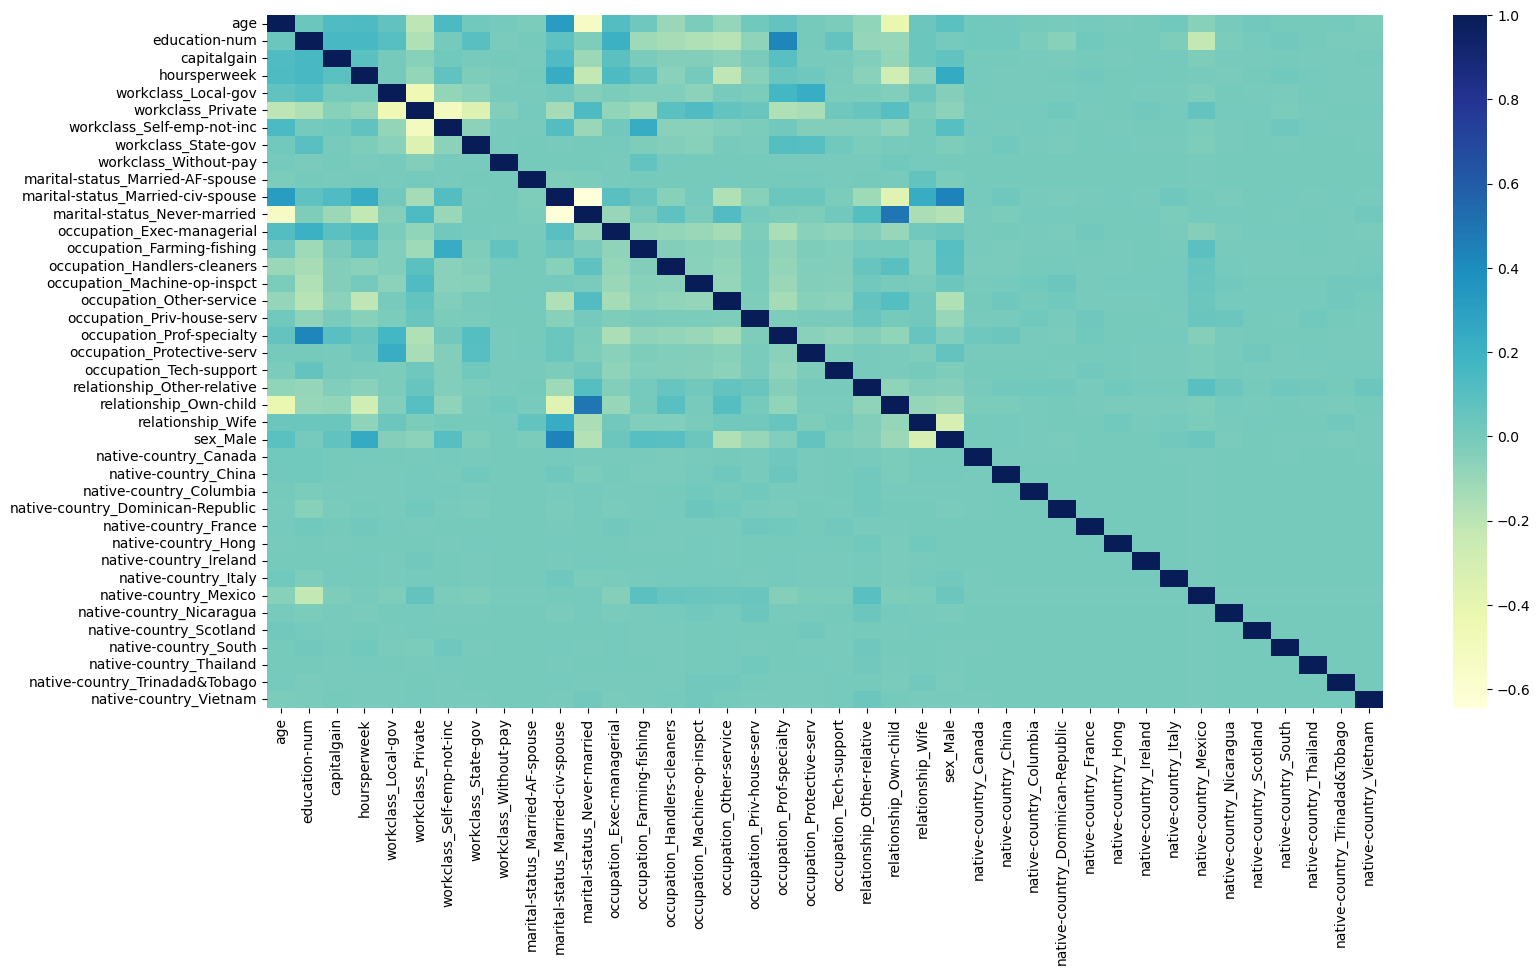

In [99]:
plt.figure(figsize=(18, 9))
sns.heatmap(X_train_rfe.corr(), cmap="YlGnBu")

In [100]:
clf_logit_rfe.fit(X_train_rfe, y_train)

LogisticRegression()

In [101]:
X_test_rfe = X_test[X_train_cols]

In [102]:
y_test_pred_rfe = clf_logit_rfe.predict(X_test_rfe)

In [103]:
metrics.accuracy_score(y_test, y_test_pred_rfe)

0.8413061104149775

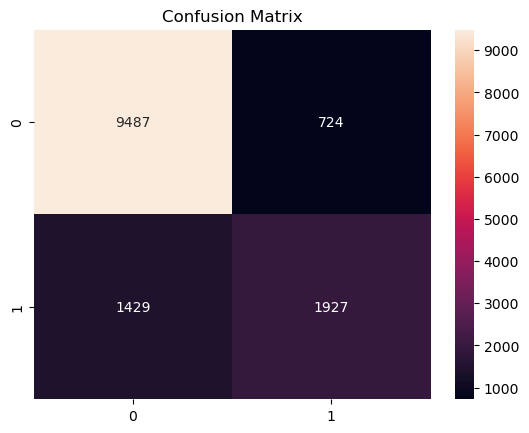

In [104]:
sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred_rfe), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [105]:
print(metrics.classification_report(y_test, y_test_pred_rfe))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10211
         1.0       0.73      0.57      0.64      3356

    accuracy                           0.84     13567
   macro avg       0.80      0.75      0.77     13567
weighted avg       0.83      0.84      0.83     13567



In [106]:
prob_rfe = clf_logit_rfe.predict_proba(X_test_rfe)
prob_rfe = prob_rfe[:, 1]
roc_auc_rfe = metrics.roc_auc_score(y_test, prob_rfe)
print(roc_auc_rfe)

0.8982464924538017


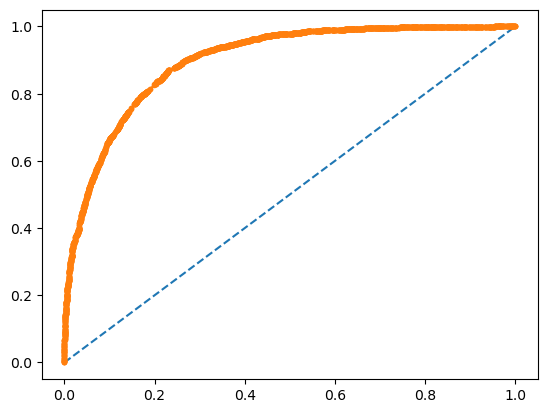

In [107]:
# ploting roc curve
fpr_rfe, tpr_rfe, thresholds_rfe = metrics.roc_curve(y_test, prob_rfe)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(fpr_rfe, tpr_rfe, marker='.')
plt.show()

### Principal Component Analysis


In [108]:
X_train.shape

(31655, 80)

In [109]:
X_train.head()

,age,education-num,capitalgain,capitalloss,hoursperweek,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
25079,1.760747,-0.046403,-0.271176,-0.207942,0.013644,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1039,1.760747,-0.438122,-0.271176,-0.207942,0.013644,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35954,0.971338,-0.046403,-0.271176,-0.207942,0.013644,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35748,0.971338,-3.180152,-0.271176,-0.207942,0.013644,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38543,-1.396888,-0.438122,-0.271176,-0.207942,-1.128942,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [111]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [112]:
pca.fit(X_train)

PCA(random_state=0)

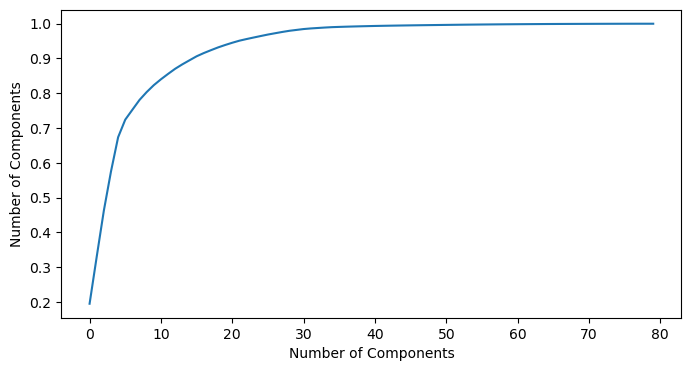

In [120]:
plt.figure(figsize = (8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Number of Components')
plt.show()

In [118]:
np.cumsum(pca.explained_variance_ratio_)

array([0.19453313, 0.32989933, 0.46245651, 0.57500073, 0.67352063,
       0.72406724, 0.75257565, 0.78081625, 0.80335376, 0.82324577,
       0.84012488, 0.85562   , 0.87045678, 0.8831639 , 0.8947819 ,
       0.90630063, 0.91553204, 0.92380525, 0.93177866, 0.93878182,
       0.94527367, 0.95120497, 0.955916  , 0.96033668, 0.96465339,
       0.96888777, 0.97261648, 0.97630501, 0.97963545, 0.98217788,
       0.98468505, 0.98642351, 0.98776564, 0.98905631, 0.9901551 ,
       0.99086568, 0.99149363, 0.99208545, 0.99260733, 0.99310788,
       0.99356221, 0.99396077, 0.99432907, 0.99466684, 0.99497744,
       0.99528293, 0.99556969, 0.99584412, 0.99610682, 0.99636732,
       0.99662477, 0.99687589, 0.99711895, 0.9973489 , 0.99755637,
       0.99776174, 0.99795029, 0.99813255, 0.99830139, 0.99845946,
       0.99860732, 0.99874774, 0.99888195, 0.99901125, 0.99913646,
       0.99924653, 0.99933686, 0.9994155 , 0.99949289, 0.99956706,
       0.99963757, 0.99970519, 0.99977013, 0.99982512, 0.99987

In [121]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 15, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)


In [122]:
X_train_pca.shape

(31655, 15)

In [123]:
corrmat = np.corrcoef(X_train_pca.T)

<AxesSubplot:>

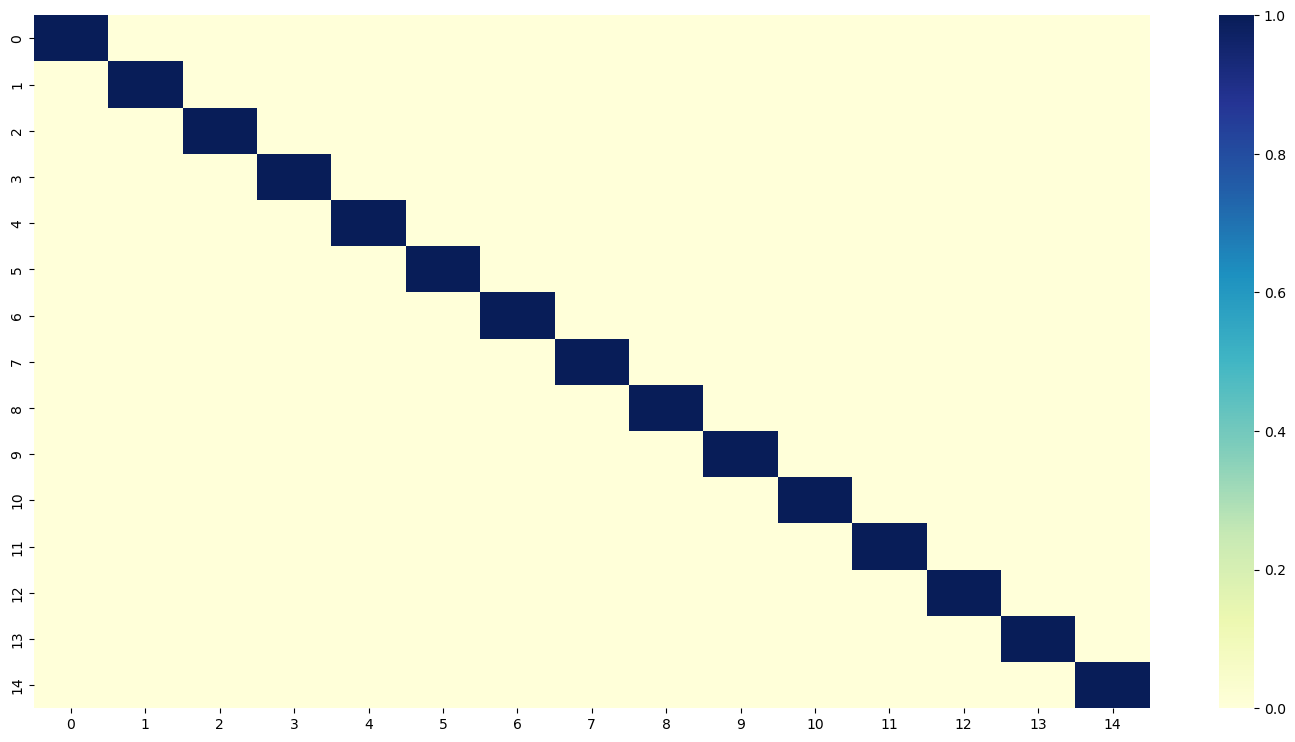

In [124]:
plt.figure(figsize=(18, 9))
sns.heatmap(corrmat, cmap="YlGnBu")

In [125]:
X_test.head()

,age,education-num,capitalgain,capitalloss,hoursperweek,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
40273,-0.607479,1.128753,-0.271176,-0.207942,0.013644,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1984,1.760747,1.520471,5.018650,-0.207942,2.298815,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1230,0.181930,-0.046403,-0.271176,-0.207942,0.013644,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25507,-0.607479,0.345316,-0.271176,-0.207942,1.156229,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
553,0.181930,-2.004996,-0.271176,-0.207942,0.013644,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [126]:
X_test_pca = pca_final.transform(X_test)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [128]:
clf_logit_pca = LogisticRegression()
clf_tree_pca = DecisionTreeClassifier()
clf_svm_pca = SVC(probability = True)

In [129]:
classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC']

In [130]:
models = {clf_logit_pca: 'LogisticRegression', 
          clf_tree_pca: 'DecisionTreeClassifier', 
          clf_svm_pca: 'SVC'}

In [133]:


def train(algo, name, X_train_pca, y_train, X_test_pca, y_test):
    algo.fit(X_train_pca, y_train)
    y_test_pred_pca = algo.predict(X_test_pca)
    return y_test_pred_pca


def performance(algo, name, X_test, y_test, y_test_pred_pca):
    # Accuracy Score
    score = metrics.accuracy_score(y_test, y_test_pred_pca)
    print('Accuracy score for', name, ':', score)
    
    # Confusion Metrics
    sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred_pca), annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification Report
    print(metrics.classification_report(y_test, y_test_pred_pca))
    
    # ROC AUC Score
    prob_pca = algo.predict_proba(X_test_pca)
    prob_pca = prob_pca[:, 1]
    roc_auc_pca = metrics.roc_auc_score(y_test, prob_pca)
    print(roc_auc_pca)
    
    # Plotting ROC Curve
    fpr_pca, tpr_pca, thresholds_pca = metrics.roc_curve(y_test, prob_pca)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr_pca, tpr_pca, marker='.')
    plt.show()
    
    return roc_auc_pca


def main(models):
    auc = []
    for algo, name in models.items():
        print('#'*40, name, '#'*40)
        y_test_pred_pca = train(algo, name, X_train_pca, y_train, X_test_pca, y_test)
        roc_auc_pca = performance(algo, name, X_test, y_test, y_test_pred_pca)
        auc.append(roc_auc_pca)
    return auc

######################################## LogisticRegression ########################################
Accuracy score for LogisticRegression : 0.8377681138055576


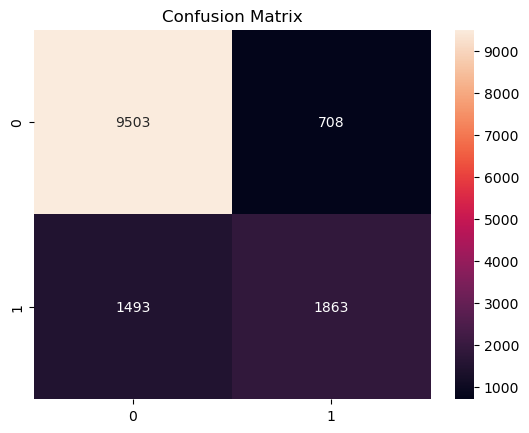

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90     10211
         1.0       0.72      0.56      0.63      3356

    accuracy                           0.84     13567
   macro avg       0.79      0.74      0.76     13567
weighted avg       0.83      0.84      0.83     13567

0.8931608612507324


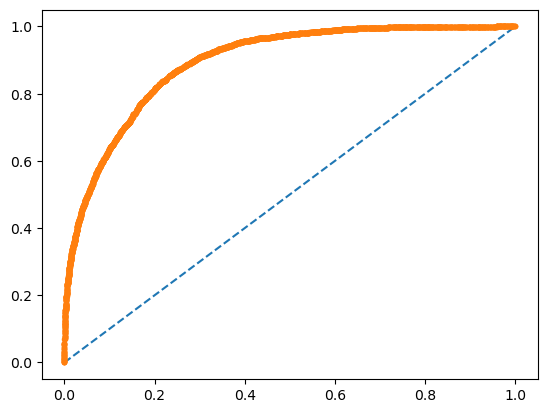

######################################## DecisionTreeClassifier ########################################
Accuracy score for DecisionTreeClassifier : 0.8205940885973317


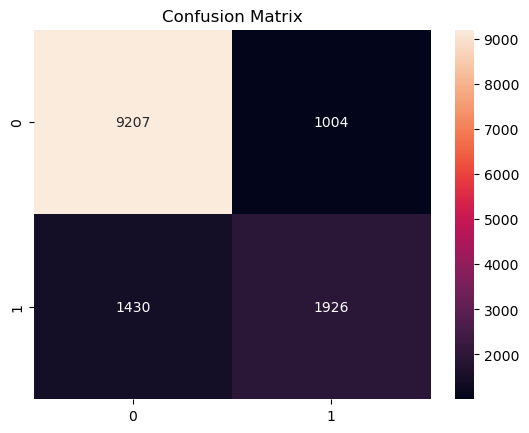

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     10211
         1.0       0.66      0.57      0.61      3356

    accuracy                           0.82     13567
   macro avg       0.76      0.74      0.75     13567
weighted avg       0.81      0.82      0.82     13567

0.801105377371782


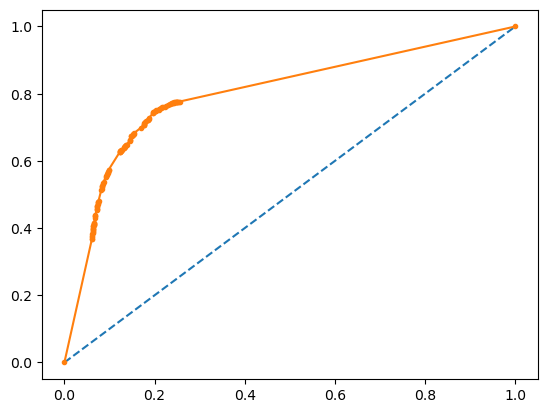

######################################## SVC ########################################
Accuracy score for SVC : 0.8435173582958649


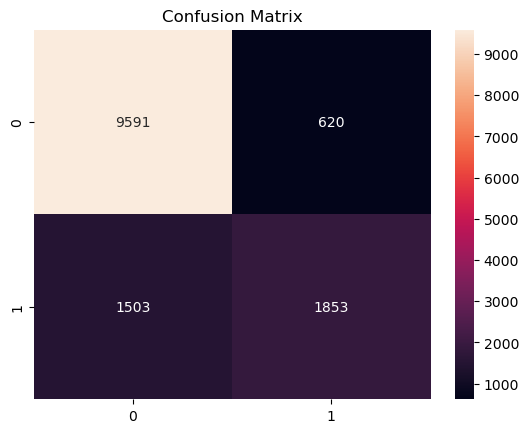

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     10211
         1.0       0.75      0.55      0.64      3356

    accuracy                           0.84     13567
   macro avg       0.81      0.75      0.77     13567
weighted avg       0.84      0.84      0.83     13567

0.8797592199115936


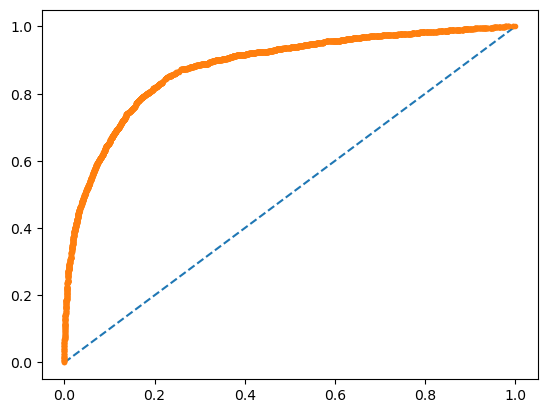

Wall time: 4min 52s


In [134]:
%%time
auc=main(models)

In [135]:
model_comp_df = pd.DataFrame(auc, columns = ['ROC AUC'], index = classifiers)

model_comp_df

,ROC AUC
LogisticRegression,0.893161
DecisionTreeClassifier,0.801105
SVC,0.879759
